# Structure from Motion

### The Projective space

Points in $ \mathbb{P}^2 $ are represented as

$$ \mathbf{x} = \begin{bmatrix}
x & y & w
\end{bmatrix}^T
$$


Lines are represented as

$$
\mathbf{x}^T\mathbf{l} = 0
$$

Where 

$$ \mathbf{l} = \begin{bmatrix}
a & b & c
\end{bmatrix}^T
$$


### Null space

Finding any non-zero vector $\mathbf{x}$ satifying the equation

$$
A\mathbf{x} = \mathbf{0}
$$

In [3]:
import numpy as np
from numpy.linalg import svd

def nullspace(A, atol=1e-13, rtol=0):
    A = np.atleast_2d(A)
    u, s, vh = svd(A)
    tol = max(atol, rtol * s[0])
    nnz = (s >= tol).sum()
    ns = vh[nnz:].conj().T
    return ns

A = np.array([[1, 0],
              [0, 1]])
print(nullspace(A))

A = np.array([[1, 0],
              [0, 0]])
n = nullspace(A)
print(n)
print(np.dot(A, n))
k = 17
print(np.dot(A, k * n))


[]
[[0.]
 [1.]]
[[0.]
 [0.]]
[[0.]
 [0.]]


### Projective camera

A projective camera $\texttt{P}$ transforms a world point $\mathbf{X}$ into a image point $\mathbf{x}.$

$$\mathbf{x} = \texttt{P}\mathbf{X}$$

Where $\texttt{P}$ is a 3x4 matrix and the world point $\mathbf{X}$ is a 4-vector while the imgage point $\mathbf{x}$ is a 3-vector.

In [28]:
P = np.array([
    [20,  0, 0, -10],
    [ 0, 20, 0, -10],
    [ 0,  0, 1, 0],
])
X = [3, 4, 10, 1]
x = np.dot(P, X)
print(x)

[50 70 10]


The camera matrix $\texttt{P}$ can be decomposed into the calibration matrix $\texttt{K}$ and a rotation and translation pair like so

$$
\texttt{P} = K
\begin{bmatrix}
\texttt{R} & \mathbf{t}
\end{bmatrix}
$$

In [24]:
K = np.array([
    [10, 0, 50],
    [0, 10, 50],
    [0, 0, 1]
])
R = np.eye(3)
t = np.array([10, 10, 0])
P = np.dot(K, np.hstack([R, t[:, None]]))
print(P)

[[ 10.   0.  50. 100.]
 [  0.  10.  50. 100.]
 [  0.   0.   1.   0.]]


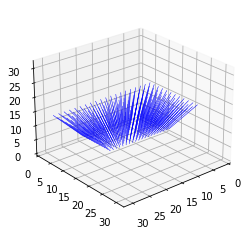

In [164]:
%matplotlib inline
from mpl_toolkits.mplot3d.art3d import Line3DCollection

width = 20
height = 12
line_size = 8

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim([0, 32])
ax.set_ylim([0, 32])
ax.set_zlim([0, 32])

f = 12
K = np.array([
    [f,  0, width/2],
    [0, f, height/2],
    [0, 0, 1],
])

x, y = np.meshgrid(range(width), range(height))
w = np.ones(x.shape)
p1s = np.stack([x, y, w], axis=-1).reshape((-1, 3))
normals = np.dot(np.linalg.inv(K), p1s.T).T

p2s = p1s + normals * line_size
ls = np.stack([p1s, p2s], axis=1)
lc = Line3DCollection(ls, linewidths=0.5, colors='b')
ax.add_collection(lc)

ax.view_init(elev=25, azim=50)

plt.show()

### Epipolar Geometry

### The Fundamental Matrix

### Extracting cameras

### Triangulation